# House Prices Dataset - Exploratory Data Analysis (EDA)

In this notebook, we will explore the House Prices dataset. The objectives of this EDA are to:

- **Understand the Data Structure:**  
  Examine the columns, data types, and general summary statistics.
  
- **Identify Missing Values:**  
  Determine which features have missing values and the extent of these missing data points.

- **Visualize Distributions:**  
  Look at the distribution of key variables, especially the target variable `SalePrice`, and see how they relate to other features.

- **Detect Outliers:**  
  Identify any outliers or unusual data points that might need further investigation.

By doing this, we will lay the foundation for effective data cleaning and feature engineering in later steps.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Load the training dataset from the 'data/raw' folder
df = pd.read_csv('C:/Users/ycarvalho/OneDrive - EDENRED/Documentos/Data_Analysis_MLE_Kaggle/House_Prices_Dataset/data/raw/train.csv')

print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Show summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Step 2: Data Cleaning

In this step, we'll clean the House Prices dataset by addressing missing values, handling outliers, and preparing the data for feature engineering. Here are the main tasks:

1. **Identify Missing Values:**  
   We'll inspect each column to see which ones have missing data and how many values are missing.

2. **Handle Missing Values:**  
   Depending on the column:
   - For numeric columns, we can fill missing values with the median (or mean) value.
   - For categorical columns, we may fill missing values with the mode or mark them as "None" if appropriate.
   - In some cases, if a column has too many missing values, we might consider dropping it.

3. **Detect Outliers:**  
   We'll look at the distributions of key numerical features (like `SalePrice`, `GrLivArea`, etc.) to identify any outliers that might need special handling.

4. **Data Type Conversions:**  
   Ensure that each feature is in the correct format (e.g., categorical features are encoded as such).

Cleaning the data properly will help ensure that our subsequent feature engineering and model building steps work more effectively.


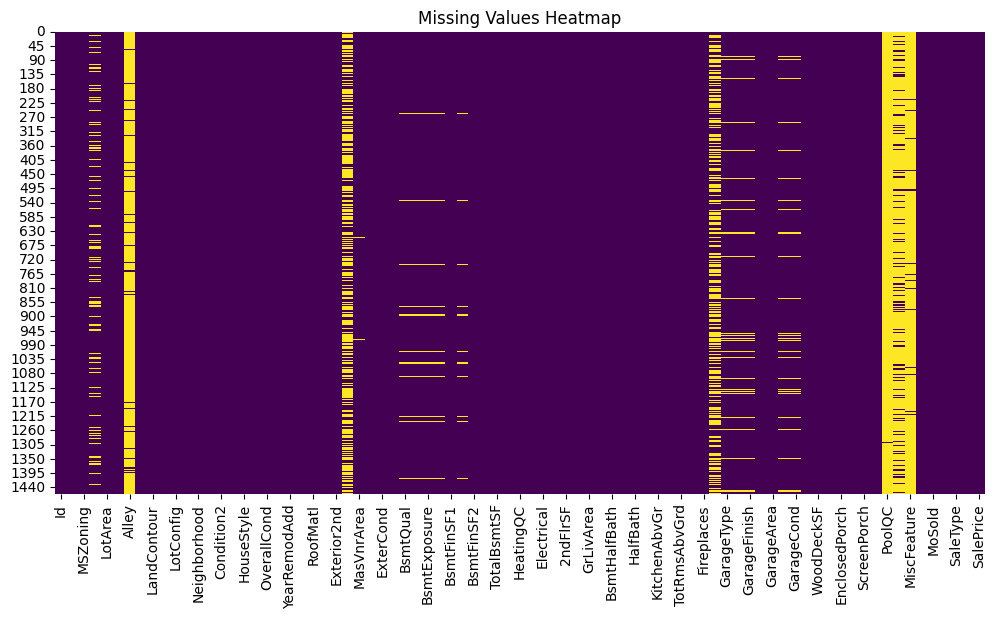


Missing Values after Imputation:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Cleaned data saved to '.../data/processed/train_cleaned.csv'


In [8]:
# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Handling missing values
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# For categorical columns, fill missing values with the mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no more missing values
print("\nMissing Values after Imputation:")
print(df.isnull().sum().sort_values(ascending=False))

# Optionally, save the cleaned dataset to the 'data/processed' folder for future use
df.to_csv('C:/Users/ycarvalho/OneDrive - EDENRED/Documentos/Data_Analysis_MLE_Kaggle/House_Prices_Dataset/data/processed/train_cleaned.csv', index=False)
print("\nCleaned data saved to '.../data/processed/train_cleaned.csv'")

# Step 3: Feature Engineering

In this step, we will create and transform features in the House Prices dataset to improve our model’s performance. Feature engineering is crucial because:

- **It enhances the predictive power** of the model by providing it with more informative features.
- **It can reduce noise** and help in capturing non-linear relationships in the data.
- **It often involves**:
  - Converting skewed distributions (especially for the target variable `SalePrice`).
  - Creating new features (e.g., total square footage or a combination of related features).
  - Encoding categorical variables (using one-hot encoding or label encoding).
  - Scaling numeric features to a similar range.

### Some Common Feature Engineering Techniques for House Prices:
1. **Log Transformation:**  
   The `SalePrice` variable and some predictors (like `GrLivArea`) might be right-skewed. Applying a log transformation can help in normalizing these distributions.
   
2. **Creating New Features:**  
   For example, combining `TotalBsmtSF` (basement area) and `GrLivArea` (above ground living area) to create a `TotalArea` feature.
   
3. **One-Hot Encoding:**  
   Converting categorical variables (e.g., `Neighborhood`, `HouseStyle`) into dummy/indicator variables.
   
4. **Feature Scaling:**  
   Sometimes, scaling numeric features (using StandardScaler or MinMaxScaler) is beneficial, especially for models sensitive to feature scale.

Let's dive into some of these techniques with an example.


Initial data preview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD   

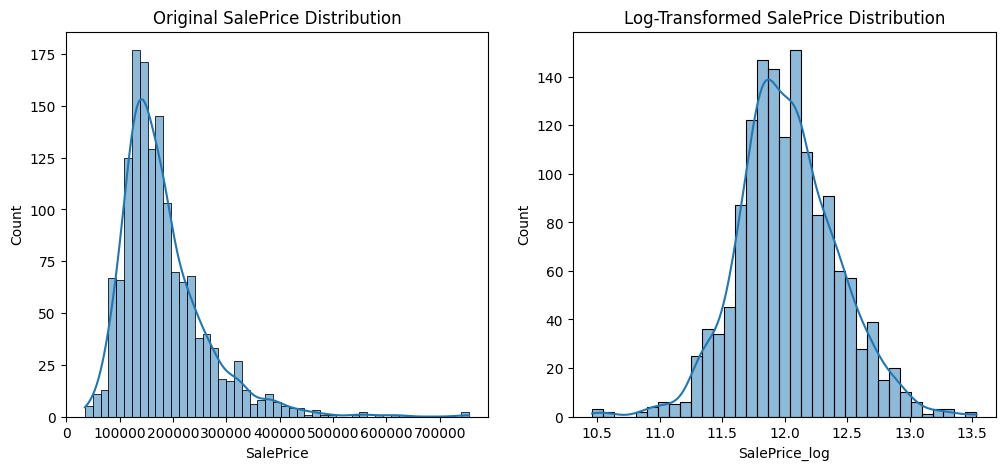


Data after Feature Engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 112 entries, Id to HouseStyle_SLvl
dtypes: bool(31), float64(4), int64(36), object(41)
memory usage: 968.2+ KB
None
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... Neighborhood_StoneBr Neighborhood_Timber  \
0         Lvl    AllPub  ...                False               False   
1         Lvl    AllPub  ...                False               False   
2         Lvl    AllPub  ...                False               False   
3         Lvl    AllPub  ...   

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset from the processed folder
df = pd.read_csv('../data/processed/train_cleaned.csv')

# Display the first few rows to see our current features
print("Initial data preview:")
print(df.head())

# 1. Log Transformation on the Target Variable 'SalePrice'
# Often, 'SalePrice' is right-skewed. Taking the logarithm can help normalize its distribution.
df['SalePrice_log'] = np.log(df['SalePrice'])

# Visualize the original and transformed SalePrice distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title("Original SalePrice Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice_log'], kde=True)
plt.title("Log-Transformed SalePrice Distribution")

plt.show()

# 2. Creating New Features
# Example: TotalArea = TotalBsmtSF + GrLivArea
if 'TotalBsmtSF' in df.columns and 'GrLivArea' in df.columns:
    df['TotalArea'] = df['TotalBsmtSF'] + df['GrLivArea']

# 3. One-Hot Encoding for Categorical Variables
# Let's select a few categorical columns for demonstration (e.g., 'Neighborhood', 'HouseStyle')
# You can adjust this list based on your dataset.
cat_cols = ['Neighborhood', 'HouseStyle']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 4. Feature Scaling (optional step)
# Sometimes scaling numeric features improves model performance.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# num_cols = df.select_dtypes(include=[np.number]).columns
# df[num_cols] = scaler.fit_transform(df[num_cols])

# Display updated dataframe info and first few rows after feature engineering
print("\nData after Feature Engineering:")
print(df.info())
print(df.head())

# Optionally, save the feature-engineered dataset to the processed folder for future use
df.to_csv('../data/processed/train_fe.csv', index=False)
print("\nFeature-engineered data saved to '../data/processed/train_fe.csv'")


# Step 4: Model Building

In this step, we'll build a baseline regression model using Linear Regression. Our objectives are to:

- **Split the Data:**  
  Divide our feature-engineered dataset into a training set (used for learning the model) and a testing set (used for evaluating the model's performance).

- **Train a Baseline Model:**  
  We'll use a simple Linear Regression model as our baseline. This model will help us understand how well the features we've engineered can predict the target variable, `SalePrice`.

- **Evaluate the Model:**  
  We'll use regression metrics such as:
  - **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.
  - **Root Mean Squared Error (RMSE):** The square root of MSE, giving an error measure in the same units as `SalePrice`.
  - **Mean Absolute Error (MAE):** The average absolute differences between predictions and actual values.
  - **R² Score:** Represents the proportion of the variance in the target variable that is predictable from the features.
  
This baseline model will serve as a starting point. Later, we can experiment with more complex models (like Random Forests or Gradient Boosting) and further refine our feature engineering.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the feature-engineered dataset from the processed folder
df = pd.read_csv('../data/processed/train_fe.csv')

# For baseline modeling, we need to define our features (X) and target (y).
# We'll predict the original 'SalePrice'. (Alternatively, you can choose 'SalePrice_log' if the target is highly skewed.)
X = df.drop(['SalePrice', 'SalePrice_log'], axis=1, errors='ignore')
y = df['SalePrice']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the baseline Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Optional: Visualize actual vs predicted SalePrice
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.7)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.show()
